In [39]:
import pandas as pd
cv_results = pd.read_csv("../data/all_models/cv_results_interpretation/cv_results_all_models.csv", encoding='utf-8', header=0, index_col=0)
df = pd.read_csv("../data/hepatotoxicity_ALT_KlekFP_preprocessing_and_analyst.csv", header=0, index_col=False)

In [40]:
cv_results

,model,params
0,SVR,"(0.1, 0.01, 3, 'auto', 'linear', 1e-05)"
1,Lasso,0.01
2,SGDRegressor,"(0.0, 'invscaling')"
3,LinearRegressor,0


In [41]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

models=[
    SVR(C=0.1, coef0=0.01, degree=3, gamma='auto', kernel='linear', tol=1e-05),
    Lasso(alpha=0.01, random_state=6346),
    SGDRegressor(alpha=0.0, learning_rate='invscaling', random_state=6346),
    LinearRegression()
]

In [42]:
df

,ALT,KRFP1,KRFP2,KRFP14,KRFP16,KRFP17,KRFP18,KRFP20,KRFP34,KRFP45,...,KRFP4810,KRFP4811,KRFP4813,KRFP4820,KRFP4829,KRFP4830,KRFP4836,KRFP4843,KRFP4852,KRFP4856
0,3.514526,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.642836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.366092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.425515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,3.808882,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3.671225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,3.496508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,3.999118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,3.569533,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
columns = list(df.columns.values)
columns.remove('ALT')

In [44]:
X = df[columns].values
y = df['ALT'].values

In [45]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=234)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=75579)

In [52]:
from sklearn.metrics import r2_score
import numpy as np
import pickle

all_models_results=pd.DataFrame(columns=['model', 'r2_score'])
for id, model in enumerate(models):
    results_test_score = pd.DataFrame()
    
    for idx, (train_index, test_index) in enumerate(cv_outer.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        model_name=str(model)[:str(model).index("(")]
        with open('../data/all_models/pickles/' + model_name +'['+ str(idx) + '].pickle', 'wb') as handle:
            pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
        Y_pred_train = model.predict(X_train)
        train_score = model.score(X_train, y_train)
        Y_pred_test = model.predict(X_test)
        test_score = model.score(X_test, y_test)
        res=pd.DataFrame([{'model':model_name, 'r2_score':test_score}])
        all_models_results=all_models_results.append(res, ignore_index=True)

In [50]:
all_models_results

,model,r2_score
0,SVR,7.923342e-01
1,SVR,6.356213e-01
2,SVR,4.798009e-01
3,SVR,7.390949e-01
4,SVR,8.484398e-01
5,Lasso,8.152667e-01
6,Lasso,4.625889e-01
7,Lasso,3.424759e-01
8,Lasso,6.777581e-01
9,Lasso,8.564826e-01


In [51]:
all_models_results_group=all_models_results.groupby('model').agg({'r2_score': "mean"})
final_result=pd.DataFrame(all_models_results_group)
final_result

,r2_score
model,
Lasso,6.309145e-01
LinearRegression,-1.518069e+25
SGDRegressor,5.708214e-01
SVR,6.990582e-01


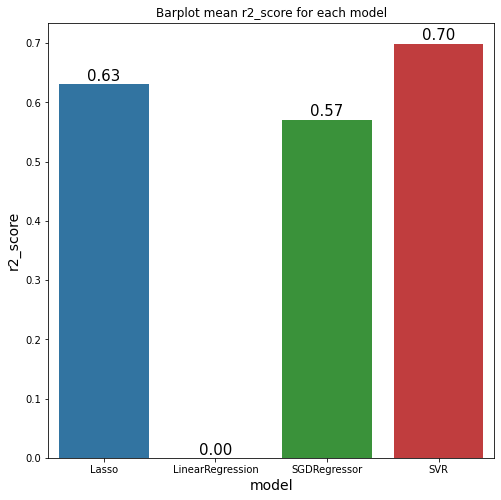

<Figure size 432x288 with 0 Axes>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
final_result.reset_index(inplace = True)
final_result.at[1, 'r2_score'] = 0


plt.figure(figsize=(8, 8))
 
plots = sns.barplot(x="model", y="r2_score", data=final_result)

for bar in plots.patches:
   
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("model", size=14)
plt.ylabel("r2_score", size=14)
plt.title("Barplot mean r2_score for each model")
 
plt.show()
plt.savefig("../explanations/r2_score_for_each_model.png")